In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns # Biblioteca Estatística
import matplotlib.pyplot as plt # Biblioteca para Plotar Gráficos
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Abrir o link "HOMICICIOS MULHERES" e baixar os dados de 2011 a 2021
path_homicidios = 'Colar caminho do arquivo'
homicidios = pd.read_csv(path_homicidios, sep=";")

homicidios = homicidios[(homicidios['período'] <= 2021) & (homicidios['período'] >= 2011)]
homicidios

,cod,nome,período,valor
594,16,AP,2011,19
595,14,RR,2011,10
596,24,RN,2011,76
597,26,PE,2011,261
598,51,MT,2011,87
...,...,...,...,...
886,29,BA,2021,463
887,50,MS,2021,66
888,13,AM,2021,135
889,28,SE,2021,37


# Casos de Homicídios nos últimos 11 anos

In [ ]:
hom_ano = homicidios.groupby('período')['valor'].sum().reset_index(name='quantidade')
hom_ano

,período,quantidade
0,2011,4522
1,2012,4729
2,2013,4769
3,2014,4836
4,2015,4621
5,2016,4645
6,2017,4936
7,2018,4519
8,2019,3737
9,2020,3833


# Casos de Homicídios por UF (2011 - 2021)

In [ ]:
homicidios = homicidios.rename(columns={"nome": "uf", "valor": "quantidade_casos"})

In [ ]:
hom_uf = homicidios.groupby('uf')['quantidade_casos'].sum().reset_index()
hom_uf = hom_uf.sort_values(by="quantidade_casos", ascending=False)
hom_uf

,uf,quantidade_casos
25,SP,5611
4,BA,4734
10,MG,4088
18,RJ,3964
5,CE,3168
22,RS,2739
13,PA,2720
17,PR,2709
15,PE,2709
8,GO,2479


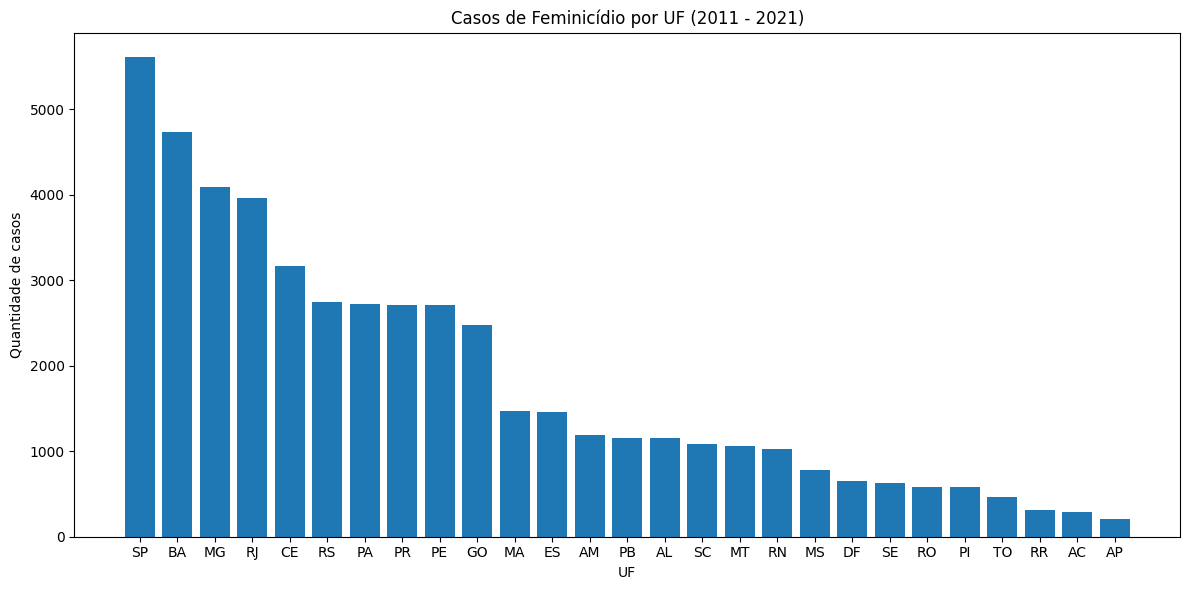

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hom_uf['uf'], hom_uf['quantidade_casos'])
plt.title("Casos de Feminicídio por UF (2011 - 2021)")
plt.xlabel("UF")
plt.ylabel("Quantidade de casos")

plt.tight_layout()
plt.show()

# Casos de Homicídios por UF em 2021

In [ ]:
hom21 = homicidios[homicidios['período'] == 2021]
hom21_uf = hom21.groupby('uf')['quantidade_casos'].sum().reset_index()

hom21_uf = hom21_uf.sort_values(by="quantidade_casos", ascending=False)
hom21_uf

,uf,quantidade_casos
4,BA,463
25,SP,342
5,CE,336
18,RJ,284
10,MG,249
15,PE,245
22,RS,230
13,PA,208
17,PR,197
8,GO,145


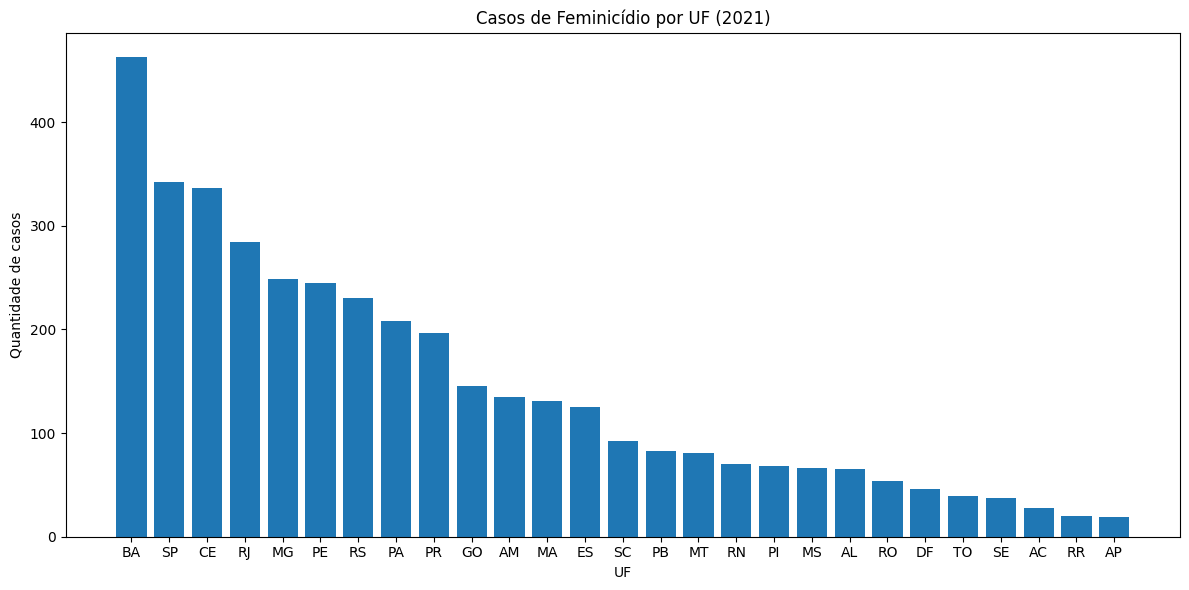

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hom21_uf['uf'], hom21_uf['quantidade_casos'])
plt.title("Casos de Feminicídio por UF (2021)")
plt.xlabel("UF")
plt.ylabel("Quantidade de casos")

plt.tight_layout()
plt.show()

# Taxa de Homicídio por UF: Homicídios / População de Mulheres

In [ ]:
#Abrir o link PROJECAO DA POPULACAO e baixar os dados de 2011 a 2021
path_pop = 'Colar caminho do arquivo'
populacao = pd.read_excel(path_pop)

populacao

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M
0,2011,11,RO,Rondônia,1603348,811709,791639
1,2012,11,RO,Rondônia,1619871,819843,800028
2,2013,11,RO,Rondônia,1635974,827821,808153
3,2014,11,RO,Rondônia,1651873,835681,816192
4,2015,11,RO,Rondônia,1666906,843047,823859
...,...,...,...,...,...,...,...
292,2017,53,DF,Distrito Federal,2850314,1365608,1484706
293,2018,53,DF,Distrito Federal,2875413,1377411,1498002
294,2019,53,DF,Distrito Federal,2899708,1388762,1510946
295,2020,53,DF,Distrito Federal,2921417,1398532,1522885


In [ ]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ANO     297 non-null    int64 
 1   CÓD.    297 non-null    int64 
 2   SIGLA   297 non-null    object
 3   LOCAL   297 non-null    object
 4   POP_T   297 non-null    int64 
 5   POP_H   297 non-null    int64 
 6   POP_M   297 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 16.4+ KB


In [ ]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 594 to 890
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cod               297 non-null    int64 
 1   uf                297 non-null    object
 2   período           297 non-null    int64 
 3   quantidade_casos  297 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.6+ KB


In [ ]:
populacao = populacao.rename(columns={"ANO": "período", "CÓD.": "cod", "SIGLA": "uf", "POP_M": "pop_m", "POP_H": "pop_h", "POP_T": "pop_t", "LOCAL": "local"})

In [ ]:
df_taxa = pd.merge(
    homicidios,
    populacao,
    on=['cod', 'período'],
    how="left"
)

df_taxa['taxa_por_100k'] = (df_taxa['quantidade_casos'] / df_taxa['pop_m']) * 100000
df_taxa["taxa_por_100k"] = df_taxa["taxa_por_100k"].round(2)

df_taxa = df_taxa.drop(columns="uf_y")
df_taxa = df_taxa.rename(columns={"uf_x": "uf"})

df_taxa

,cod,uf,período,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
0,16,AP,2011,19,Amapá,699770,350480,349290,5.44
1,14,RR,2011,10,Roraima,481480,243330,238150,4.20
2,24,RN,2011,76,Rio Grande do Norte,3227267,1574681,1652586,4.60
3,26,PE,2011,261,Pernambuco,8982283,4314687,4667596,5.59
4,51,MT,2011,87,Mato Grosso,3133302,1596551,1536751,5.66
...,...,...,...,...,...,...,...,...,...
292,29,BA,2021,463,Bahia,14788270,7200570,7587700,6.10
293,50,MS,2021,66,Mato Grosso do Sul,2831943,1404058,1427885,4.62
294,13,AM,2021,135,Amazonas,4160013,2091465,2068548,6.53
295,28,SE,2021,37,Sergipe,2264937,1092127,1172810,3.15


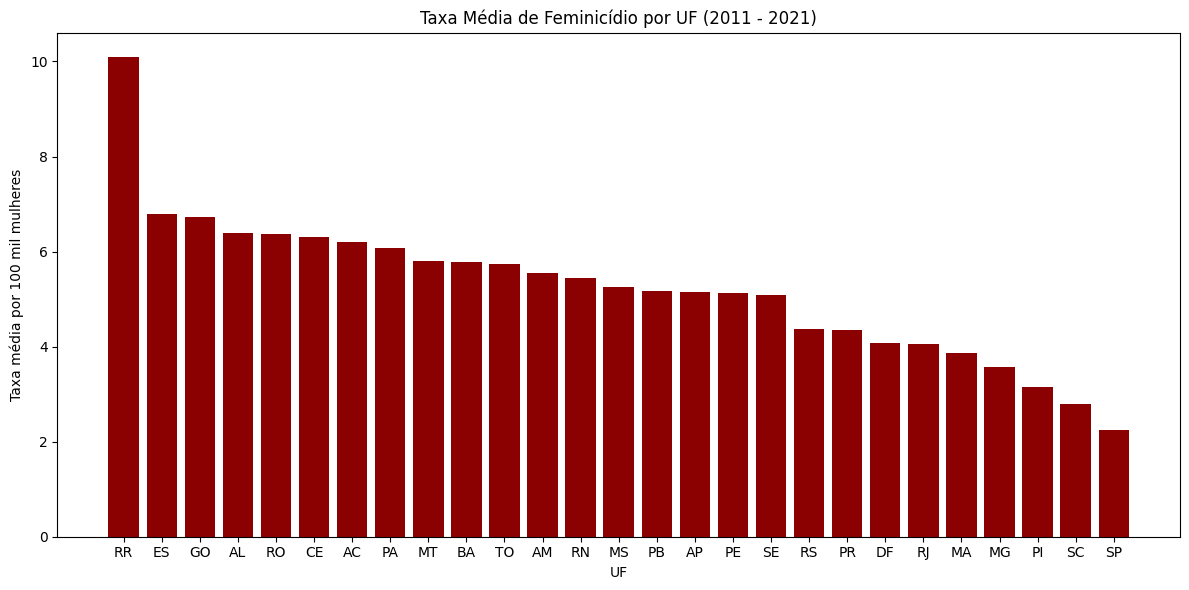

In [ ]:
taxa_media_uf = df_taxa.groupby('uf')['taxa_por_100k'].mean().reset_index()
taxa_media_uf = taxa_media_uf.sort_values(by="taxa_por_100k", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(taxa_media_uf['uf'], taxa_media_uf['taxa_por_100k'], color="darkred")

plt.title("Taxa Média de Feminicídio por UF (2011 - 2021)")
plt.xlabel("UF")
plt.ylabel("Taxa média por 100 mil mulheres")

plt.tight_layout()
plt.show()


In [ ]:
hom21_uf

,uf,quantidade_casos
4,BA,463
25,SP,342
5,CE,336
18,RJ,284
10,MG,249
15,PE,245
22,RS,230
13,PA,208
17,PR,197
8,GO,145


In [ ]:
taxa_media_uf

,uf,taxa_por_100k
21,RR,10.098182
7,ES,6.794545
8,GO,6.719091
1,AL,6.399091
20,RO,6.360909
5,CE,6.307273
0,AC,6.209091
13,PA,6.079091
12,MT,5.804545
4,BA,5.789091


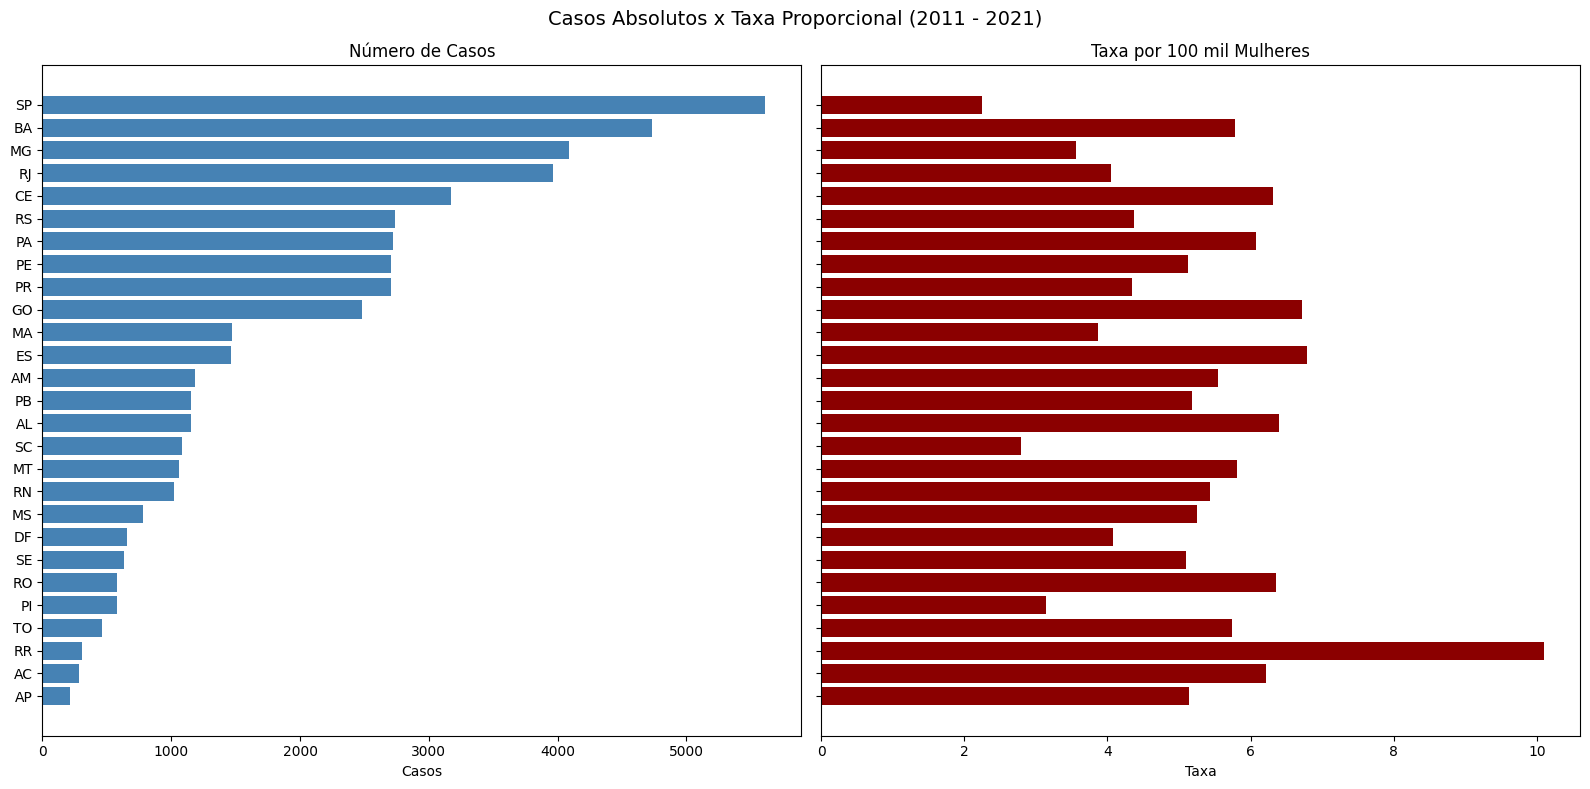

In [ ]:
comparativo = pd.merge(hom_uf, taxa_media_uf, on="uf", how="inner")

comparativo = comparativo.sort_values(by="quantidade_casos", ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axes[0].barh(comparativo["uf"], comparativo["quantidade_casos"], color="steelblue")
axes[0].set_title("Número de Casos")
axes[0].set_xlabel("Casos")

axes[1].barh(comparativo["uf"], comparativo["taxa_por_100k"], color="darkred")
axes[1].set_title("Taxa por 100 mil Mulheres")
axes[1].set_xlabel("Taxa")

plt.suptitle("Casos Absolutos x Taxa Proporcional (2011 - 2021)", fontsize=14)
plt.tight_layout()
plt.show()

# Distribuição taxas de Feminicídio nos últimos 4 anos (Todos os Estados)

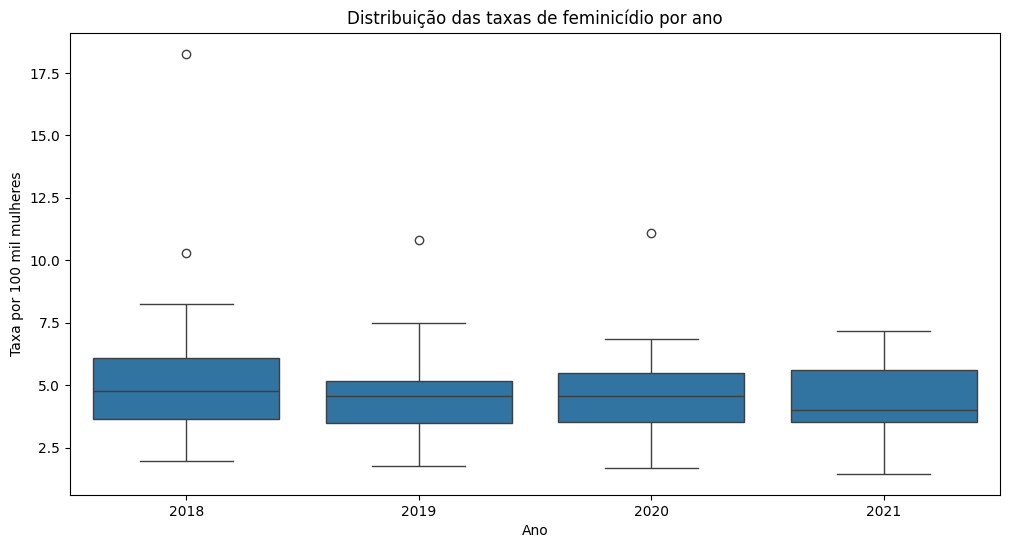

In [ ]:
df_last4 = df_taxa[df_taxa["período"].between(2018, 2021)]

plt.figure(figsize=(12,6))
sns.boxplot(x="período", y="taxa_por_100k", data=df_last4)
plt.title("Distribuição das taxas de feminicídio por ano")
plt.xlabel("Ano")
plt.ylabel("Taxa por 100 mil mulheres")
plt.show()

In [ ]:
df_last4

,cod,uf,período,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
189,28,SE,2018,40,Sergipe,2227068,1075717,1151351,3.47
190,23,CE,2018,475,Ceará,8976628,4363676,4612952,10.30
191,26,PE,2018,240,Pernambuco,9348293,4492495,4855798,4.94
192,22,PI,2018,52,Piauí,3302227,1617920,1684307,3.09
193,27,AL,2018,67,Alagoas,3200128,1545589,1654539,4.05
...,...,...,...,...,...,...,...,...,...
292,29,BA,2021,463,Bahia,14788270,7200570,7587700,6.10
293,50,MS,2021,66,Mato Grosso do Sul,2831943,1404058,1427885,4.62
294,13,AM,2021,135,Amazonas,4160013,2091465,2068548,6.53
295,28,SE,2021,37,Sergipe,2264937,1092127,1172810,3.15


In [ ]:
df_last4_ce = df_last4[df_last4['uf'] == 'CE']

df_last4_ce

,cod,uf,período,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
190,23,CE,2018,475,Ceará,8976628,4363676,4612952,10.30
236,23,CE,2019,221,Ceará,9035631,4392602,4643029,4.76
255,23,CE,2020,319,Ceará,9088929,4417737,4671192,6.83
288,23,CE,2021,336,Ceará,9129520,4435709,4693811,7.16


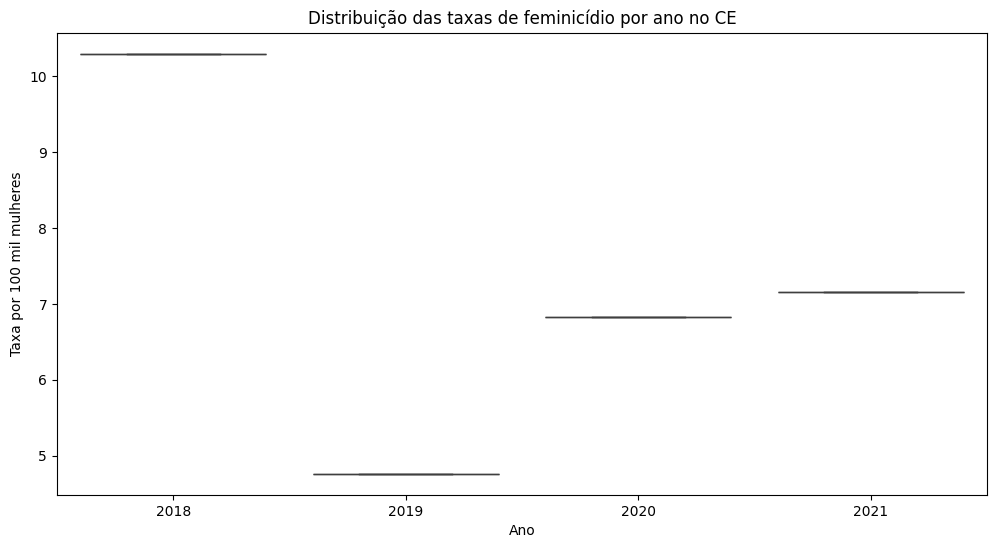

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="período", y="taxa_por_100k", data=df_last4_ce)
plt.title("Distribuição das taxas de feminicídio por ano no CE")
plt.xlabel("Ano")
plt.ylabel("Taxa por 100 mil mulheres")
plt.show()

# Comparativo entre número absoluto de casos e taxa em 2021

In [ ]:
hom_uf = homicidios.groupby('uf')['quantidade_casos'].sum().reset_index()
hom_uf = hom_uf.sort_values(by="quantidade_casos", ascending=False)
hom_uf

,uf,quantidade_casos
25,SP,5611
4,BA,4734
10,MG,4088
18,RJ,3964
5,CE,3168
22,RS,2739
13,PA,2720
17,PR,2709
15,PE,2709
8,GO,2479


In [ ]:
taxa_media_uf = df_taxa.groupby('uf')['taxa_por_100k'].mean().reset_index()
taxa_media_uf = taxa_media_uf.sort_values(by="taxa_por_100k", ascending=False)
taxa_media_uf

,uf,taxa_por_100k
21,RR,10.098182
7,ES,6.794545
8,GO,6.719091
1,AL,6.399091
20,RO,6.360909
5,CE,6.307273
0,AC,6.209091
13,PA,6.079091
12,MT,5.804545
4,BA,5.789091


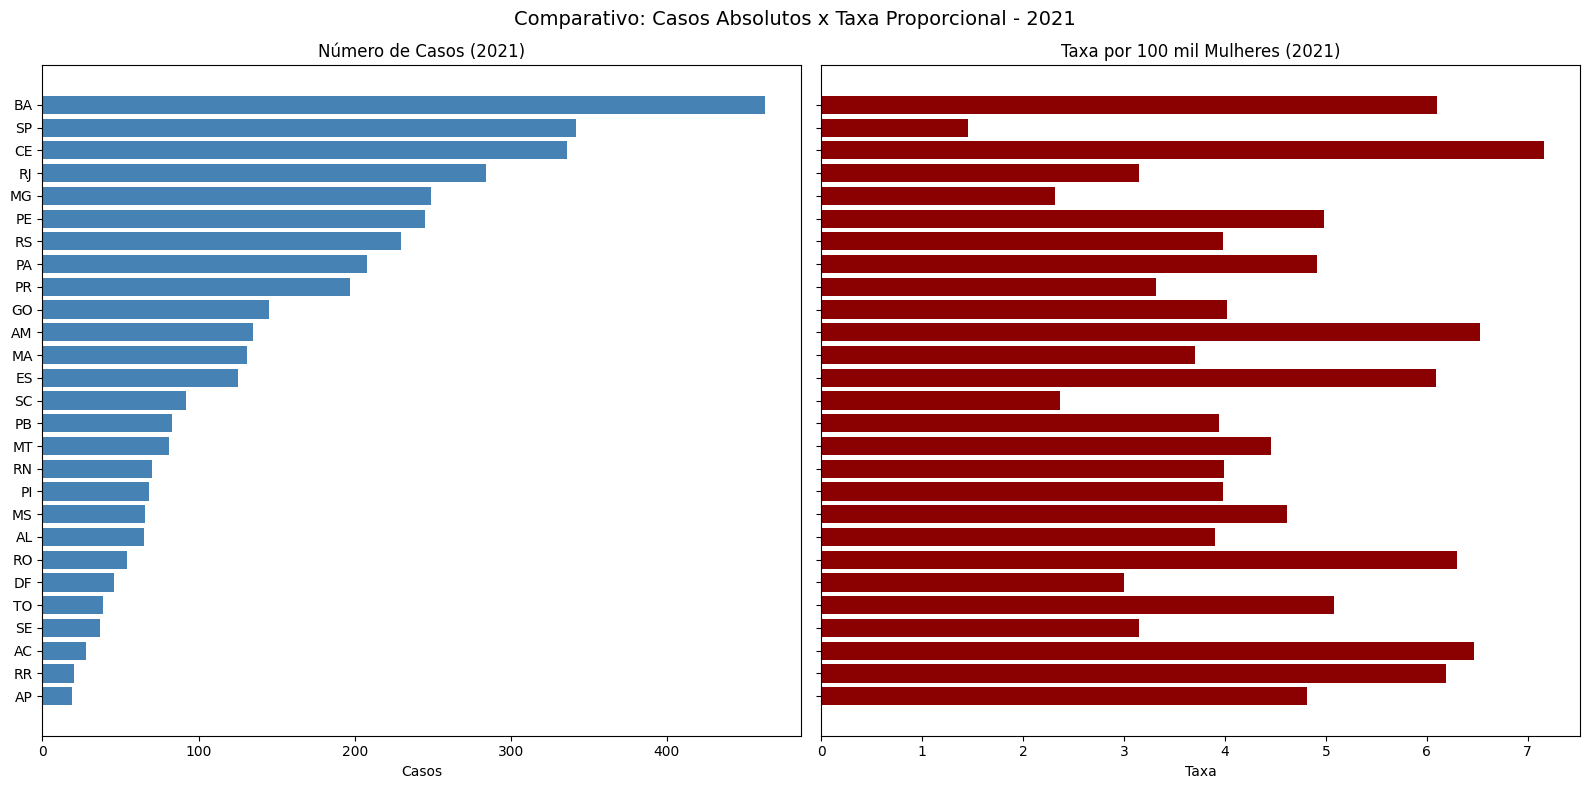

In [ ]:
hom_uf_2021 = homicidios[homicidios["período"] == 2021].groupby("uf")["quantidade_casos"].sum().reset_index()
hom_uf_2021 = hom_uf_2021.sort_values(by="quantidade_casos", ascending=False)

taxa_uf_2021 = df_taxa[df_taxa["período"] == 2021].groupby("uf")["taxa_por_100k"].mean().reset_index()
taxa_uf_2021 = taxa_uf_2021.sort_values(by="taxa_por_100k", ascending=False)

comparativo_2021 = pd.merge(hom_uf_2021, taxa_uf_2021, on="uf", how="inner")

comparativo_2021 = comparativo_2021.sort_values(by="quantidade_casos", ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axes[0].barh(comparativo_2021["uf"], comparativo_2021["quantidade_casos"], color="steelblue")
axes[0].set_title("Número de Casos (2021)")
axes[0].set_xlabel("Casos")

axes[1].barh(comparativo_2021["uf"], comparativo_2021["taxa_por_100k"], color="darkred")
axes[1].set_title("Taxa por 100 mil Mulheres (2021)")
axes[1].set_xlabel("Taxa")

plt.suptitle("Comparativo: Casos Absolutos x Taxa Proporcional - 2021", fontsize=14)
plt.tight_layout()
plt.show()

# Os 3 estados com maior taxa e menor taxa de feminicídio (2021)

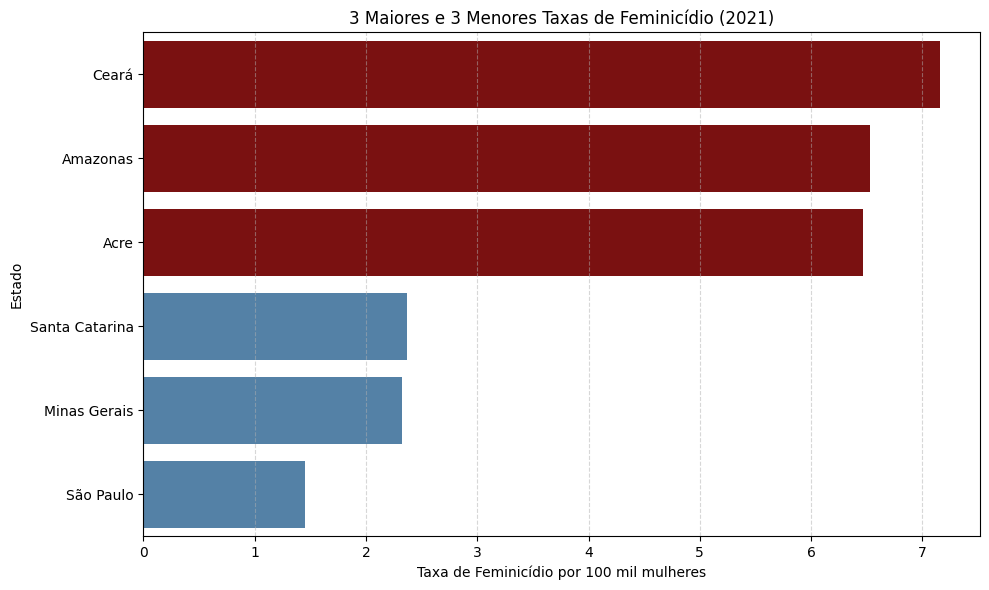

In [ ]:
df_taxa_uf_21 = df_taxa[df_taxa['período'] == 2021]

df_sorted = df_taxa_uf_21.sort_values(by="taxa_por_100k", ascending=False)

top5 = df_sorted.head(3)
bottom5 = df_sorted.tail(3)

df_extremos = pd.concat([top5, bottom5])

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_extremos,
    x="taxa_por_100k",
    y="local",
    hue=df_extremos["taxa_por_100k"] >= df_extremos["taxa_por_100k"].median(),  # cor diferente p/ top x bottom
    dodge=False,
    palette={True: "darkred", False: "steelblue"}
)

plt.xlabel("Taxa de Feminicídio por 100 mil mulheres")
plt.ylabel("Estado")
plt.title("3 Maiores e 3 Menores Taxas de Feminicídio (2021)")
plt.legend([],[], frameon=False)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Correlação com PIB Ceará

In [ ]:
path_pib = '/content/drive/MyDrive/2° SEMESTRE - IAD/Arquitetura e Processamento de Dados/Artigo Científico/PIB dos Municípios 2010-2021.xlsx'
pib = pd.read_excel(path_pib)

pib

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria, a preços correntes (R$ 1.000)","Valor adicionado bruto dos Serviços, a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes (R$ 1.000)","Valor adicionado bruto total, a preços correntes (R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1.000)","Produto Interno Bruto, a preços correntes (R$ 1.000)","Produto Interno Bruto per capita, a preços correntes (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,1.611853e+04,6.249618e+04,9.324466e+04,2.411198e+05,2.095711e+04,2.620769e+05,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,2.871386e+05,4.949463e+05,3.438677e+05,1.199664e+06,1.650296e+05,1.364694e+06,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,3.252506e+03,1.267721e+04,2.517024e+04,6.540077e+04,4.210342e+03,6.961111e+04,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,1.820515e+05,4.654473e+05,2.984543e+05,1.041212e+06,1.452817e+05,1.186494e+06,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,1.973448e+04,8.072499e+04,6.301827e+04,1.924542e+05,2.956703e+04,2.220212e+05,13037.06,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66820,2021,5,Centro-oeste,52,GO,Goiás,5222005,Vianópolis,NaN,5205,...,4.389325e+04,2.564195e+05,7.572432e+04,7.919116e+05,6.605620e+04,8.579678e+05,60900.61,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Comércio e reparação de veículos automotores e...
66821,2021,5,Centro-oeste,52,GO,Goiás,5222054,Vicentinópolis,NaN,5205,...,8.766436e+04,1.133146e+05,5.262750e+04,4.482734e+05,3.189978e+04,4.801731e+05,53340.72,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Indústrias de transformação
66822,2021,5,Centro-oeste,52,GO,Goiás,5222203,Vila Boa,Região Integrada de Desenvolvimento do Distrit...,5204,...,3.027519e+04,4.030499e+04,3.671192e+04,1.657065e+05,1.419232e+04,1.798988e+05,27886.97,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços
66823,2021,5,Centro-oeste,52,GO,Goiás,5222302,Vila Propício,Região Integrada de Desenvolvimento do Distrit...,5204,...,5.734158e+04,4.672394e+04,3.313335e+04,2.951483e+05,1.286475e+04,3.080130e+05,51845.31,"Agricultura, inclusive apoio à agricultura e a...",Indústrias extrativas,Demais serviços


In [ ]:
colunas = ['Ano', 'Código da Unidade da Federação', 'Sigla da Unidade da Federação', 'Nome da Unidade da Federação', 'Código do Município', 'Nome do Município', 'Produto Interno Bruto, a preços correntes (R$ 1.000)']
pib = pib[colunas]

pib

,Ano,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,"Produto Interno Bruto, a preços correntes (R$ 1.000)"
0,2010,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,2.620769e+05
1,2010,11,RO,Rondônia,1100023,Ariquemes,1.364694e+06
2,2010,11,RO,Rondônia,1100031,Cabixi,6.961111e+04
3,2010,11,RO,Rondônia,1100049,Cacoal,1.186494e+06
4,2010,11,RO,Rondônia,1100056,Cerejeiras,2.220212e+05
...,...,...,...,...,...,...,...
66820,2021,52,GO,Goiás,5222005,Vianópolis,8.579678e+05
66821,2021,52,GO,Goiás,5222054,Vicentinópolis,4.801731e+05
66822,2021,52,GO,Goiás,5222203,Vila Boa,1.798988e+05
66823,2021,52,GO,Goiás,5222302,Vila Propício,3.080130e+05


In [ ]:
pib = pib.rename(columns={"Produto Interno Bruto, a preços correntes (R$ 1.000)": "pib", "Sigla da Unidade da Federação": "uf", "Código da Unidade da Federação": "cod"})
pib

,Ano,cod,uf,Nome da Unidade da Federação,Código do Município,Nome do Município,pib
0,2010,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,2.620769e+05
1,2010,11,RO,Rondônia,1100023,Ariquemes,1.364694e+06
2,2010,11,RO,Rondônia,1100031,Cabixi,6.961111e+04
3,2010,11,RO,Rondônia,1100049,Cacoal,1.186494e+06
4,2010,11,RO,Rondônia,1100056,Cerejeiras,2.220212e+05
...,...,...,...,...,...,...,...
66820,2021,52,GO,Goiás,5222005,Vianópolis,8.579678e+05
66821,2021,52,GO,Goiás,5222054,Vicentinópolis,4.801731e+05
66822,2021,52,GO,Goiás,5222203,Vila Boa,1.798988e+05
66823,2021,52,GO,Goiás,5222302,Vila Propício,3.080130e+05


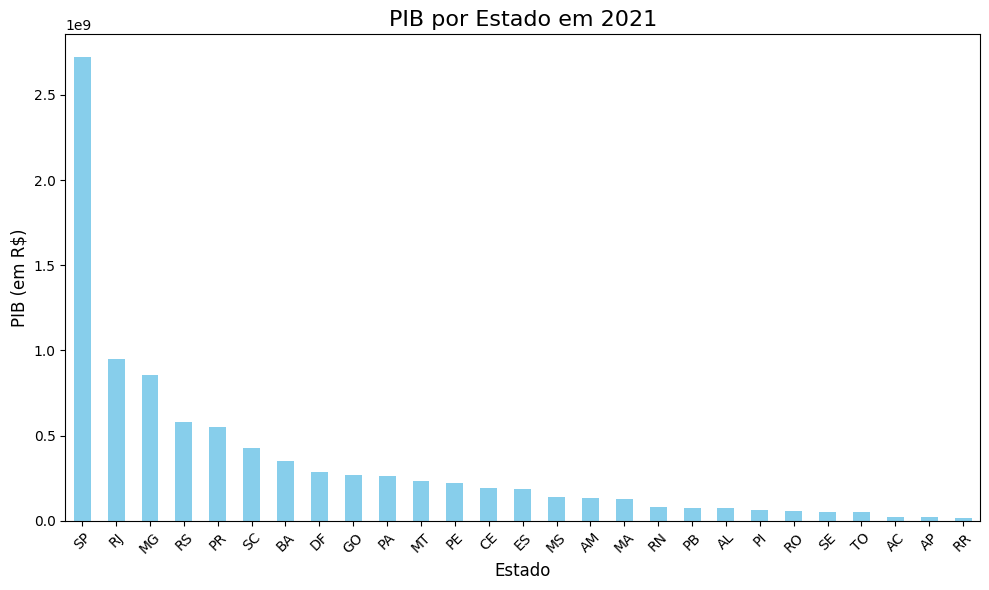

In [ ]:
pib_2021 = pib[pib['Ano'] == 2021]

pib_estado = pib_2021.groupby('uf')['pib'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
pib_estado.plot(kind='bar', color='skyblue')
plt.title('PIB por Estado em 2021', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('PIB (em R$)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Filtra os dados para o estado do Ceará (CE)
pib_ceara = pib_2021[pib_2021['uf'] == 'CE']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_total_ceara = pib_ceara['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total do Ceará em 2021 é: {pib_total_ceara}")

O PIB total do Ceará em 2021 é: 194884801.547


In [ ]:
# 1. Filtra os dados para o estado do Amazonas (AM)
pib_amazonas = pib_2021[pib_2021['uf'] == 'AM']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_total_amazonas = pib_amazonas['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total do Amazonas em 2021 é: {pib_total_amazonas}")

O PIB total do Amazonas em 2021 é: 131531037.76200001


In [ ]:
# 1. Filtra os dados para o estado do Acre (AC)
pib_acre = pib_2021[pib_2021['uf'] == 'AC']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_total_acre = pib_acre['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total do Acre em 2021 é: {pib_total_acre}")

O PIB total do Acre em 2021 é: 21374440.009


In [ ]:
# 1. Filtra os dados para o estado do Santa Catarina (SC)
pib_sc = pib_2021[pib_2021['uf'] == 'SC']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_sc_total = pib_sc['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total de Santa Catarina em 2021 é: {pib_sc_total}")

O PIB total de Santa Catarina em 2021 é: 428570888.752


In [ ]:
# 1. Filtra os dados para o estado do Minas Gerais (MG)
pib_mg = pib_2021[pib_2021['uf'] == 'MG']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_mg_total = pib_mg['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total de Minas em 2021 é: {pib_mg_total}")

O PIB total de Minas em 2021 é: 857593213.654


In [ ]:
# 1. Filtra os dados para o estado do São Paulo (SP)
pib_sp = pib_2021[pib_2021['uf'] == 'SP']

# 2. Soma a coluna 'pib' do DataFrame filtrado
pib_sp_total = pib_sp['pib'].sum()

# 3. Exibe o resultado
print(f"O PIB total de São Paulo em 2021 é: {pib_sp_total}")

O PIB total de São Paulo em 2021 é: 2719751231.375


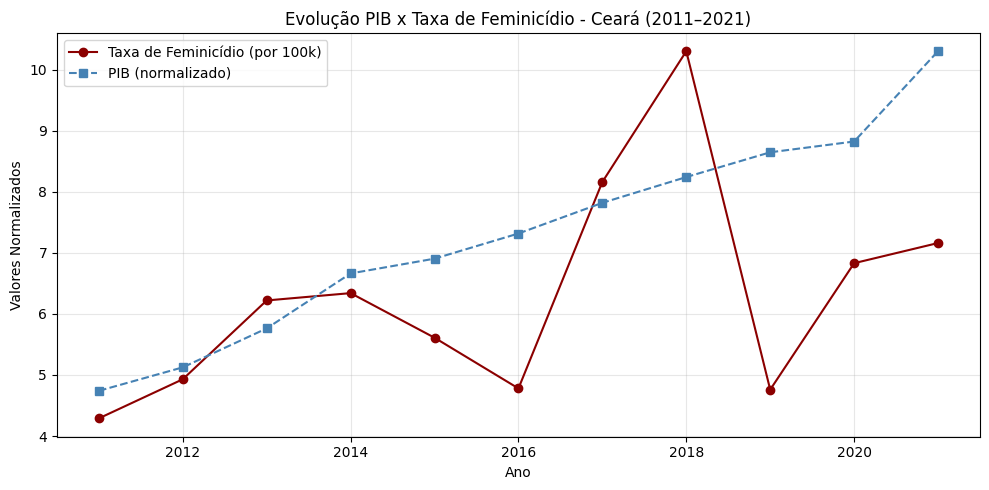

In [ ]:
df_ce = df_taxa[df_taxa['uf'] == 'CE']

pib_ce = pib[pib['uf'] == 'CE']

pib_ce_ano = pib_ce.groupby('Ano')['pib'].sum().reset_index()

pib_ce_ano = pib_ce_ano.rename(columns={'Ano': 'período', 'pib': 'pib_total'})

df_ce_analise = pd.merge(df_ce, pib_ce_ano, on='período', how='inner')
df_ce_analise = df_ce_analise[['período', 'taxa_por_100k', 'pib_total']]

df_ce_analise['pib_normalizado'] = df_ce_analise['pib_total'] / df_ce_analise['pib_total'].max() * df_ce_analise['taxa_por_100k'].max()

plt.figure(figsize=(10,5))
plt.plot(df_ce_analise['período'], df_ce_analise['taxa_por_100k'],
         marker='o', color='darkred', label='Taxa de Feminicídio (por 100k)')
plt.plot(df_ce_analise['período'], df_ce_analise['pib_normalizado'],
         marker='s', color='steelblue', linestyle='--', label='PIB (normalizado)')

plt.title("Evolução PIB x Taxa de Feminicídio - Ceará (2011–2021)")
plt.xlabel("Ano")
plt.ylabel("Valores Normalizados")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

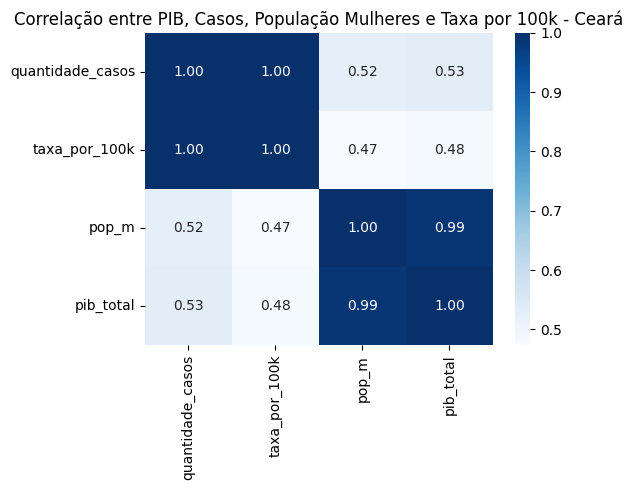

In [ ]:
df_ce = df_ce[['período', 'quantidade_casos', 'taxa_por_100k', 'pop_m']]

df_ce_analise = pd.merge(df_ce, pib_ce_ano, on='período', how='inner')
df_ce_analise
df_corr = df_ce_analise[['quantidade_casos', 'taxa_por_100k', 'pop_m', 'pib_total']]

plt.figure(figsize=(6,5))
sns.heatmap(
    df_corr.corr(),  # Correlação de Pearson
    annot=True,
    cmap='Blues',
    fmt=".2f"
)
plt.title("Correlação entre PIB, Casos, População Mulheres e Taxa por 100k - Ceará")
plt.tight_layout()
plt.show()


# Correlação com PIB Todos os Estados

In [ ]:
df_taxa

,cod,uf,período,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
0,16,AP,2011,19,Amapá,699770,350480,349290,5.44
1,14,RR,2011,10,Roraima,481480,243330,238150,4.20
2,24,RN,2011,76,Rio Grande do Norte,3227267,1574681,1652586,4.60
3,26,PE,2011,261,Pernambuco,8982283,4314687,4667596,5.59
4,51,MT,2011,87,Mato Grosso,3133302,1596551,1536751,5.66
...,...,...,...,...,...,...,...,...,...
292,29,BA,2021,463,Bahia,14788270,7200570,7587700,6.10
293,50,MS,2021,66,Mato Grosso do Sul,2831943,1404058,1427885,4.62
294,13,AM,2021,135,Amazonas,4160013,2091465,2068548,6.53
295,28,SE,2021,37,Sergipe,2264937,1092127,1172810,3.15


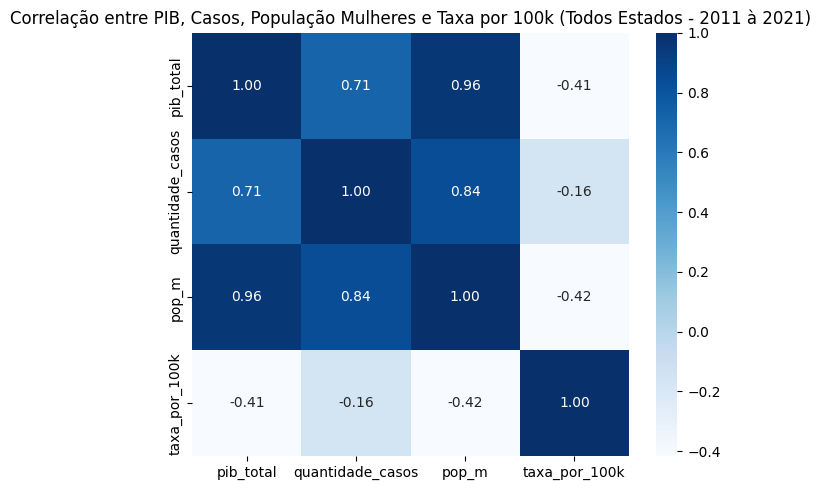

In [ ]:
pib_uf = pib.groupby('uf')['pib'].sum().reset_index().rename(columns={"pib": "pib_total"})
df_merged = pd.merge(df_taxa, pib_uf, on="uf", how="left")

df_corr = df_merged[["pib_total", "quantidade_casos", "pop_m", "taxa_por_100k"]]

plt.figure(figsize=(6, 5))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Correlação entre PIB, Casos, População Mulheres e Taxa por 100k (Todos Estados - 2011 à 2021)")
plt.tight_layout()
plt.show()

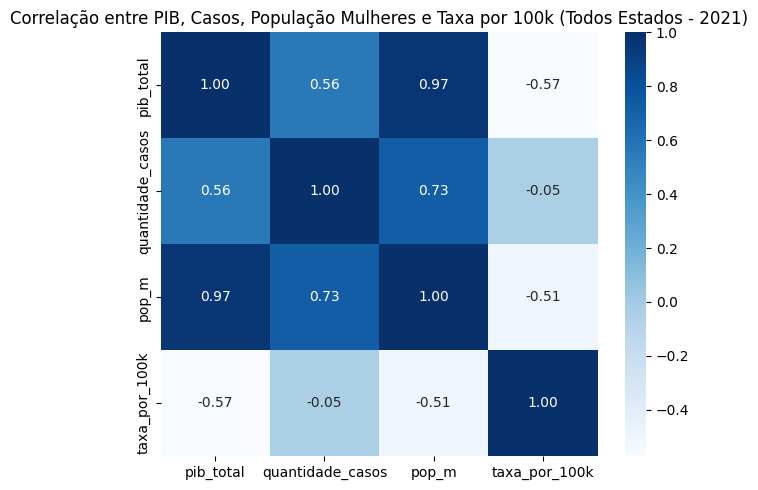

In [ ]:
pib_21 = pib[pib['Ano'] == 2021]
pib_uf_21 = pib_21.groupby('uf')['pib'].sum().reset_index().rename(columns={"pib": "pib_total"})

df_taxa_21 = df_taxa[df_taxa["período"] == 2021]

df_merged = pd.merge(df_taxa_21, pib_uf_21, on="uf", how="left")

df_corr = df_merged[["pib_total", "quantidade_casos", "pop_m", "taxa_por_100k"]]

plt.figure(figsize=(6, 5))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Correlação entre PIB, Casos, População Mulheres e Taxa por 100k (Todos Estados - 2021)")
plt.tight_layout()
plt.show()

## Relação de Taxa de Feminicído e Desemprego

In [ ]:
df_taxa

,cod,uf,período,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
0,16,AP,2011,19,Amapá,699770,350480,349290,5.44
1,14,RR,2011,10,Roraima,481480,243330,238150,4.20
2,24,RN,2011,76,Rio Grande do Norte,3227267,1574681,1652586,4.60
3,26,PE,2011,261,Pernambuco,8982283,4314687,4667596,5.59
4,51,MT,2011,87,Mato Grosso,3133302,1596551,1536751,5.66
...,...,...,...,...,...,...,...,...,...
292,29,BA,2021,463,Bahia,14788270,7200570,7587700,6.10
293,50,MS,2021,66,Mato Grosso do Sul,2831943,1404058,1427885,4.62
294,13,AM,2021,135,Amazonas,4160013,2091465,2068548,6.53
295,28,SE,2021,37,Sergipe,2264937,1092127,1172810,3.15


In [ ]:
file_desemprego = '/content/drive/MyDrive/2° SEMESTRE - IAD/Arquitetura e Processamento de Dados/Artigo Científico/ipeadata[29-09-2025-07-26]_TAXA_DESEMPREGO_MULHRES.xls'

df_taxa_desemprego = pd.read_excel(file_desemprego, sheet_name=2)

df_taxa_desemprego

,Sigla,Codigo,Estado,2012,2013,2014,2015,2016,2017,2018,2019
0,AC,12,Acre,11.600,11.825,10.425,11.100,13.550,16.675,16.575,18.500
1,AL,27,Alagoas,15.550,13.650,11.900,13.250,16.175,19.575,20.450,18.325
2,AM,13,Amazonas,12.850,12.475,10.975,13.550,18.200,21.025,17.575,19.075
3,AP,16,Amapá,17.275,16.625,14.900,14.750,20.500,22.275,24.950,21.800
4,BA,29,Bahia,14.100,14.225,12.400,15.275,19.250,20.200,19.900,20.925
5,CE,23,Ceará,9.325,9.200,8.550,9.950,13.775,14.025,12.800,12.800
6,DF,53,Distrito Federal,10.950,11.225,10.775,12.375,14.600,15.725,14.700,15.900
7,ES,32,Espírito Santo,8.900,8.600,7.800,9.200,14.200,15.275,13.575,13.650
8,GO,52,Goiás,7.325,6.850,7.200,9.375,13.125,13.175,11.875,12.925
9,MA,21,Maranhão,10.825,10.575,8.950,10.625,14.200,16.100,16.250,16.850


In [ ]:
df_fem = df_taxa.copy()
df_fem = df_fem.rename(columns={'período':'ano', 'uf':'Sigla'})
df_fem = df_fem[df_fem['ano'].between(2012,2019)]
df_fem

,cod,Sigla,ano,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
27,24,RN,2012,64,Rio Grande do Norte,3251725,1586454,1665271,3.84
28,43,RS,2012,247,Rio Grande do Sul,10944672,5322394,5622278,4.39
29,12,AC,2012,16,Acre,791681,397269,394412,4.06
30,11,RO,2012,51,Rondônia,1619871,819843,800028,6.37
31,17,TO,2012,49,Tocantins,1426020,723489,702531,6.97
...,...,...,...,...,...,...,...,...,...
238,43,RS,2019,236,Rio Grande do Sul,11194346,5439509,5754837,4.10
239,41,PR,2019,204,Paraná,11468227,5620794,5847433,3.49
240,35,SP,2019,405,São Paulo,45306139,21982415,23323724,1.74
241,17,TO,2019,36,Tocantins,1525148,770981,754167,4.77


In [ ]:
df_des = df_taxa_desemprego.copy()
df_des_melt = df_des.melt(
    id_vars=['Sigla','Codigo','Estado'],
    var_name='ano',
    value_name='desemprego'
)
df_des_melt['ano'] = df_des_melt['ano'].astype(int)
df_des_melt

,Sigla,Codigo,Estado,ano,desemprego
0,AC,12,Acre,2012,11.600
1,AL,27,Alagoas,2012,15.550
2,AM,13,Amazonas,2012,12.850
3,AP,16,Amapá,2012,17.275
4,BA,29,Bahia,2012,14.100
...,...,...,...,...,...
211,RS,43,Rio Grande do Sul,2019,10.150
212,SC,42,Santa Catarina,2019,7.600
213,SE,28,Sergipe,2019,18.200
214,SP,35,São Paulo,2019,14.525


In [ ]:
df_merged = pd.merge(df_fem, df_des_melt, on=['Sigla','ano'], how='inner')

corr = df_merged[['taxa_por_100k','desemprego']].corr().iloc[0,1]
print(f"Correlação entre taxa de feminicídio e desemprego: {corr:.3f}")

Correlação entre taxa de feminicídio e desemprego: 0.072


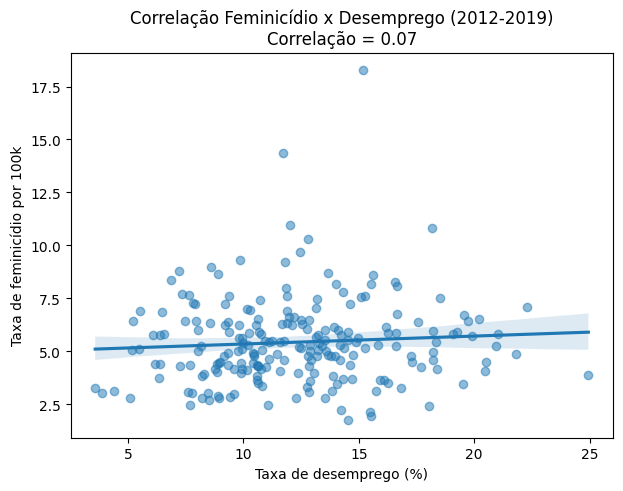

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(data=df_merged, x='desemprego', y='taxa_por_100k', scatter_kws={'alpha':0.5})
plt.title(f"Correlação Feminicídio x Desemprego (2012-2019)\nCorrelação = {corr:.2f}")
plt.xlabel("Taxa de desemprego (%)")
plt.ylabel("Taxa de feminicídio por 100k")
plt.show()

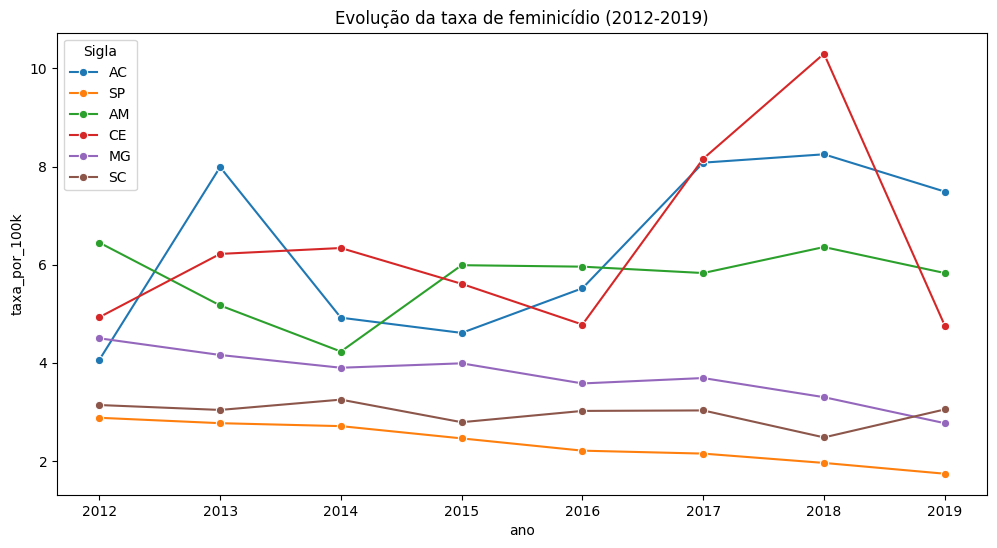

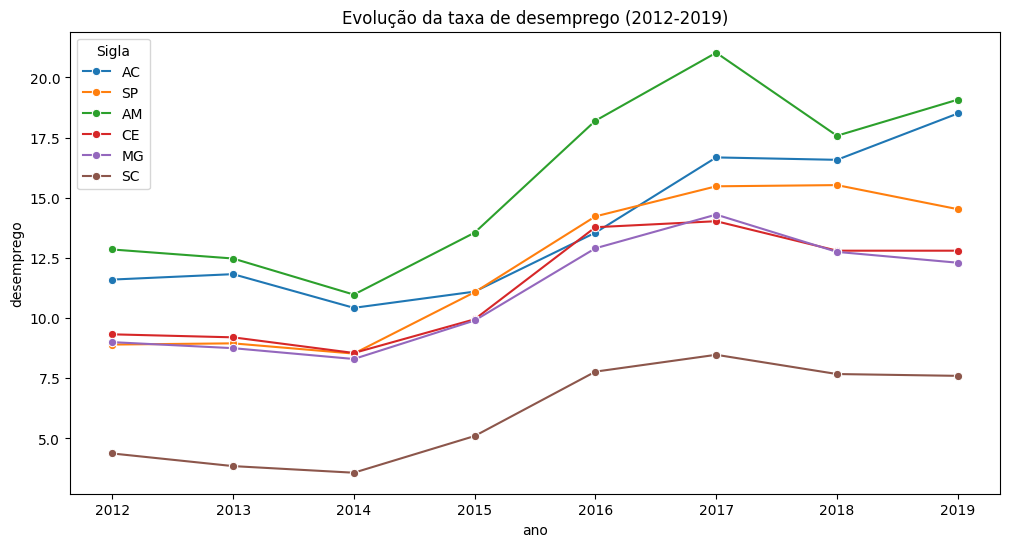

In [ ]:
estados_exemplo = ['CE','AC','AM','SP','SC', 'MG']
df_plot = df_merged[df_merged['Sigla'].isin(estados_exemplo)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='ano', y='taxa_por_100k', hue='Sigla', marker='o')
plt.title("Evolução da taxa de feminicídio (2012-2019)")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='ano', y='desemprego', hue='Sigla', marker='o')
plt.title("Evolução da taxa de desemprego (2012-2019)")
plt.show()

## Relação de Desemprego de Mulheres com o PIB


In [ ]:
df_pib_est = pib.groupby(['Ano','uf'], as_index=False)['pib'].sum()
df_pib_est = df_pib_est.rename(columns={'Ano':'ano', 'uf':'Sigla', 'pib':'PIB'})

df_pib_est

,ano,Sigla,PIB
0,2010,AC,8.342356e+06
1,2010,AL,2.713304e+07
2,2010,AM,6.087712e+07
3,2010,AP,8.237795e+06
4,2010,BA,1.544195e+08
...,...,...,...
319,2021,RS,5.812837e+08
320,2021,SC,4.285709e+08
321,2021,SE,5.186140e+07
322,2021,SP,2.719751e+09


In [ ]:
df_des_melt

,Sigla,Codigo,Estado,ano,desemprego
0,AC,12,Acre,2012,11.600
1,AL,27,Alagoas,2012,15.550
2,AM,13,Amazonas,2012,12.850
3,AP,16,Amapá,2012,17.275
4,BA,29,Bahia,2012,14.100
...,...,...,...,...,...
211,RS,43,Rio Grande do Sul,2019,10.150
212,SC,42,Santa Catarina,2019,7.600
213,SE,28,Sergipe,2019,18.200
214,SP,35,São Paulo,2019,14.525


In [ ]:
df_taxa = df_taxa.rename(columns={'período':'ano', 'uf': 'Sigla'})
df_taxa

,cod,Sigla,ano,quantidade_casos,local,pop_t,pop_h,pop_m,taxa_por_100k
0,16,AP,2011,19,Amapá,699770,350480,349290,5.44
1,14,RR,2011,10,Roraima,481480,243330,238150,4.20
2,24,RN,2011,76,Rio Grande do Norte,3227267,1574681,1652586,4.60
3,26,PE,2011,261,Pernambuco,8982283,4314687,4667596,5.59
4,51,MT,2011,87,Mato Grosso,3133302,1596551,1536751,5.66
...,...,...,...,...,...,...,...,...,...
292,29,BA,2021,463,Bahia,14788270,7200570,7587700,6.10
293,50,MS,2021,66,Mato Grosso do Sul,2831943,1404058,1427885,4.62
294,13,AM,2021,135,Amazonas,4160013,2091465,2068548,6.53
295,28,SE,2021,37,Sergipe,2264937,1092127,1172810,3.15


In [ ]:
df_pop =  df_taxa.groupby(['ano','Sigla'], as_index=False)['pop_m'].sum()

df_pib_pop = pd.merge(df_pib_est, df_pop, on=['ano','Sigla'], how='inner')
df_pib_pop['PIB_per_capita'] = df_pib_pop['PIB'] / df_pib_pop['pop_m']

df_pib_des = pd.merge(df_pib_pop, df_des_melt, on=['Sigla','ano'], how='inner')

corr_pc = df_pib_des[['PIB_per_capita','desemprego']].corr().iloc[0,1]
print(f"Correlação entre PIB per capita e desemprego: {corr_pc:.3f}")

Correlação entre PIB per capita e desemprego: -0.123


In [ ]:
df_pib_des['log_PIB_pc'] = np.log(df_pib_des['PIB_per_capita'])
corr_log = df_pib_des[['log_PIB_pc','desemprego']].corr().iloc[0,1]
print(f"Correlação entre log(PIB per capita) e desemprego: {corr_log:.3f}")

Correlação entre log(PIB per capita) e desemprego: -0.167


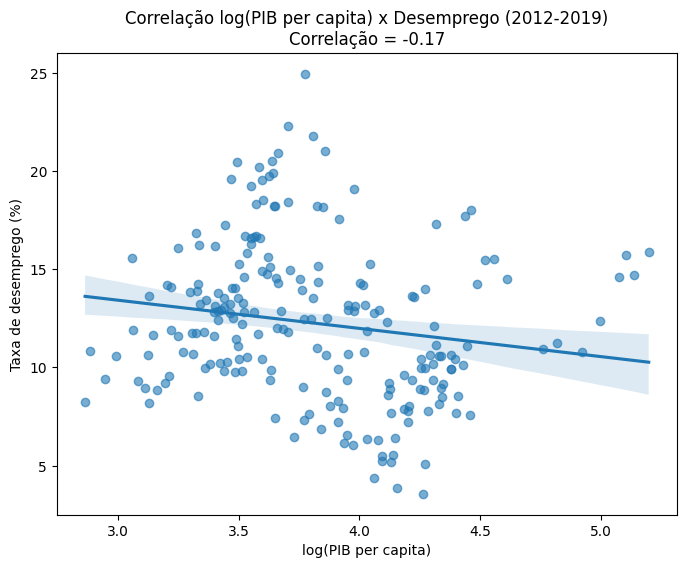

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_pib_des,
    x='log_PIB_pc',
    y='desemprego',
    scatter_kws={'alpha':0.6}
)
plt.title(f"Correlação log(PIB per capita) x Desemprego (2012-2019)\nCorrelação = {corr_log:.2f}")
plt.xlabel("log(PIB per capita)")
plt.ylabel("Taxa de desemprego (%)")
plt.show()